## Model Training

#### Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [23]:
df = pd.read_csv(r'data\synthetic_student_scores.csv')

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
0,female,group C,some high school,free/reduced,none,83,86,81
1,male,group C,master's degree,standard,none,69,67,57
2,female,group D,master's degree,free/reduced,completed,85,83,60
3,female,group C,bachelor's degree,free/reduced,none,87,93,94
4,female,group E,some college,free/reduced,none,83,80,71


#### Preparing dependent and independent variables

In [25]:
X = df.drop(columns=['math_score'],axis=1)

In [26]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,83,86
1,male,group C,master's degree,standard,none,69,67
2,female,group D,master's degree,free/reduced,completed,85,83
3,female,group C,bachelor's degree,free/reduced,none,87,93
4,female,group E,some college,free/reduced,none,83,80


In [27]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group C' 'group D' 'group E' 'group B' 'group A']
Categories in'parental level of education' variable: ['some high school' "master's degree" "bachelor's degree" 'some college'
 'high school' "associate's degree"]
Categories in 'lunch' variable:      ['free/reduced' 'standard']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [28]:
y = df['math_score']

In [29]:
y

0       81
1       57
2       60
3       94
4       71
        ..
4995    59
4996    47
4997    57
4998    44
4999    44
Name: math_score, Length: 5000, dtype: int64

In [30]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X.shape

(5000, 19)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4000, 19), (1000, 19))

In [34]:
## Evaluation function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.0153
- Mean Absolute Error: 8.0303
- R2 Score: 0.5827
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.6391
- Mean Absolute Error: 7.7013
- R2 Score: 0.5856


Lasso
Model performance for Training set
- Root Mean Squared Error: 10.0896
- Mean Absolute Error: 8.0982
- R2 Score: 0.5765
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.6532
- Mean Absolute Error: 7.6651
- R2 Score: 0.5844


Ridge
Model performance for Training set
- Root Mean Squared Error: 10.0153
- Mean Absolute Error: 8.0303
- R2 Score: 0.5827
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.6390
- Mean Absolute Error: 7.7011
- R2 Score: 0.5856


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.1243
- Mean Absolute Error: 7.2915
- R2 Score: 0.6537
--------------------

### Results

In [36]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.585640
0,Linear Regression,0.585631
1,Lasso,0.584423
8,AdaBoost Regressor,0.563106
7,CatBoosting Regressor,0.556496
5,Random Forest Regressor,0.526980
6,XGBRegressor,0.490995
3,K-Neighbors Regressor,0.479122
4,Decision Tree,0.024438


## Ridge Regression

In [37]:
lin_model = Ridge(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 58.56


In [38]:
print(np.unique(y_train))


[  4   5   6   8   9  10  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100]


## Plot y_pred and y_test

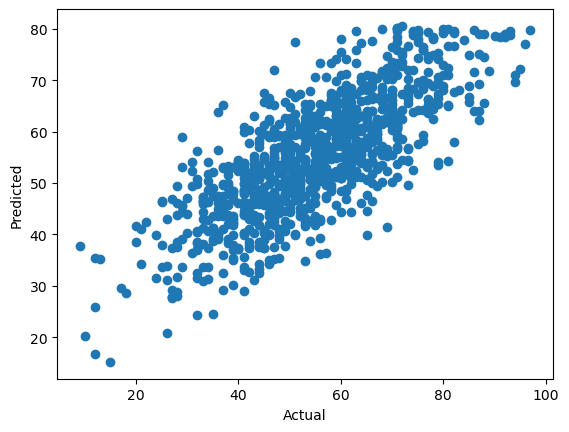

In [39]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

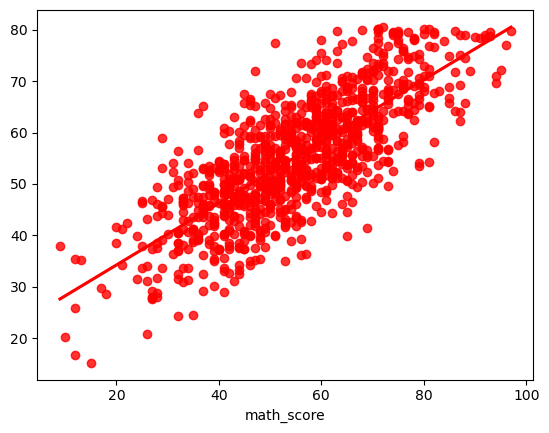

In [40]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [41]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1501,34,31.329495,2.670505
2586,43,43.675710,-0.675710
2653,54,61.618276,-7.618276
1055,58,65.343804,-7.343804
705,47,71.951601,-24.951601
...,...,...,...
4711,65,57.868692,7.131308
2313,69,64.659385,4.340615
3214,88,74.590537,13.409463
2732,79,66.552206,12.447794


In [42]:
from pathlib import Path
import pickle

artifacts = Path('artifacts')
artifacts.mkdir(exist_ok=True) 

with open(artifacts / 'ridge_regression.pkl', 'wb') as f:
    pickle.dump(lin_model, f)


### saved model